Importing Libraries for Data Analysis, Data Visualization and Machine learning tasks

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import glob as gb
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
warnings.filterwarnings('ignore')

In [2]:
# Load CSV file
final_df = pd.read_csv('final_dataframe.csv')
final_df

,temp,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,year,month,day,solar_energy_generation,surplus_status
0,1.9,84.25,0.417,100.0,1,0.0,0.0,19.4,11.0,999.9,62.2,0.0,0.0,2010,1,1,0.0,0.0
1,1.9,83.90,0.000,0.0,3,0.0,0.0,21.8,19.0,999.8,22.4,0.0,0.0,2010,1,1,0.0,0.0
2,1.4,85.76,0.000,0.0,3,0.0,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,2010,1,1,0.0,0.0
3,1.4,85.69,0.000,0.0,3,0.0,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,2010,1,1,0.0,0.0
4,1.3,85.72,0.000,0.0,3,0.0,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,2010,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122815,4.8,92.02,0.000,0.0,3,0.0,0.0,17.7,278.0,999.0,45.3,0.0,0.0,2024,1,5,0.0,0.0
122816,4.9,93.24,0.000,0.0,3,0.0,0.0,18.0,271.0,999.9,27.4,0.0,0.0,2024,1,5,0.0,0.0
122817,4.9,92.77,0.000,0.0,3,0.0,0.0,14.9,271.0,1000.9,25.0,33.0,0.0,2024,1,5,0.1,0.0
122818,5.9,87.12,0.000,0.0,3,0.0,0.0,20.1,279.0,1001.9,25.0,70.0,1.0,2024,1,5,0.3,0.0


MODELLING

Splitting the dataset :- Split dataset: Training (80%), Test (20%) sets, essential for model training, and performance evaluation.

In [3]:
# Split the dataset into features (X) and target variable (y)
X = final_df.drop('surplus_status', axis=1)  # Features
y = final_df['surplus_status']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1. Random Forest Classification :-  It is a versatile and powerful machine learning algorithm commonly used for both classification. It is an ensemble learning method that builds multiple decision trees during training and outputs the mode.

Accuracy: 0.7570021169190686
              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69     10187
         1.0       0.77      0.84      0.80     14377

    accuracy                           0.76     24564
   macro avg       0.75      0.74      0.74     24564
weighted avg       0.76      0.76      0.75     24564



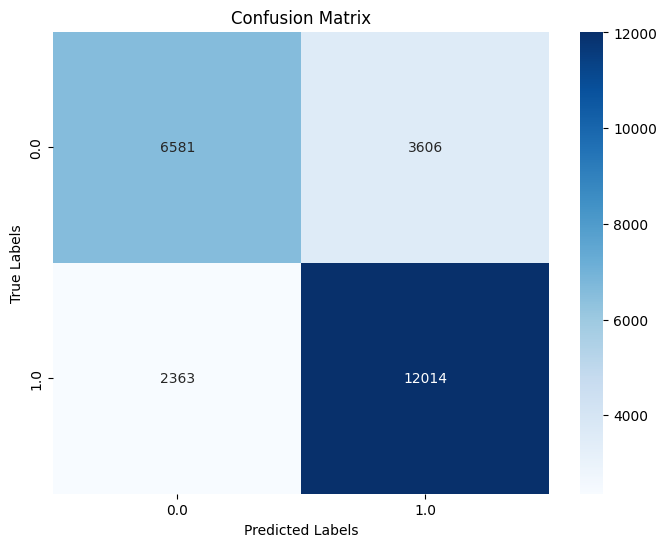

In [5]:
#1.Random Forest Classification

rf_classifier = RandomForestClassifier()

# Train the model on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred1 = rf_classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

# Print classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred1))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [6]:
# Calculate false positives
false_positives = sum((y_pred1 == 1) & (y_test == 0))

print("Number of false positives:", false_positives)

Number of false positives: 3606


In [7]:
# Calculate true negatives
true_negatives = sum((y_pred1 == 0) & (y_test == 0))

print("Number of true negatives:", true_negatives)

Number of true negatives: 6581


In [8]:
#Calculate the False positive rates
FPR = false_positives / (false_positives + true_negatives)
print("False Positive Rate : ", FPR)

False Positive Rate :  0.3539805634632375


2. Decission Tree :- It is an algorithm used for both classification and regression tasks. It works by recursively partitioning the data into subsets based on the values of input features, with the goal of maximizing the homogeneity of the target variable within each subset.

Accuracy: 0.6670737664875428
              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60     10187
         1.0       0.72      0.71      0.71     14377

    accuracy                           0.67     24564
   macro avg       0.66      0.66      0.66     24564
weighted avg       0.67      0.67      0.67     24564



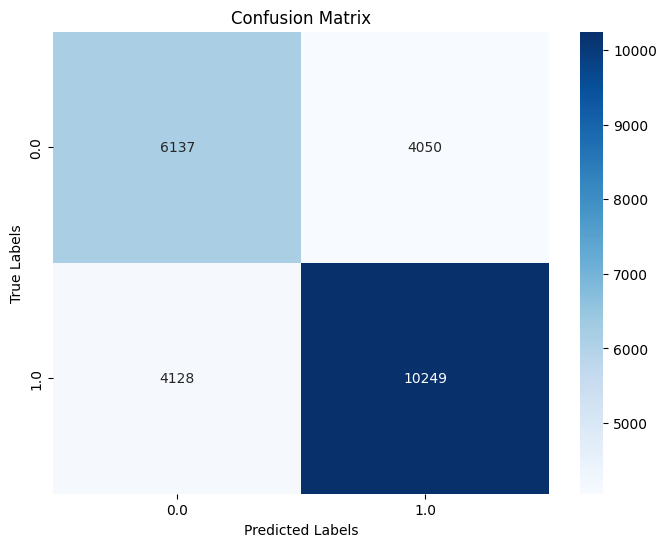

In [9]:
#2. Decission Tree

# Initialize the Decision Tree classifier
model1 = DecisionTreeClassifier()

# Train the model on the training data
model1.fit(X_train, y_train)

# Make predictions on the testing data
y_pred2 = model1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

# Print classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred2))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Calculate false positives
false_positives = sum((y_pred2 == 1) & (y_test == 0))

print("Number of false positives:", false_positives)

Number of false positives: 4050


In [11]:
# Calculate true negatives
true_negatives = sum((y_pred1 == 0) & (y_test == 0))

print("Number of true negatives:", true_negatives)

Number of true negatives: 6581


In [12]:
#Calculate the False positive rates
FPR = false_positives / (false_positives + true_negatives)
print("False Positive Rate : ", FPR)

False Positive Rate :  0.3809613394788825


3. K-Nearest Neighbors (KNN) :- It is an algorithm used for both classification and regression tasks. It is a non-parametric method that doesn't make any assumptions about the underlying data distribution.

Accuracy: 0.6538023123269826
              precision    recall  f1-score   support

         0.0       0.59      0.54      0.56     10187
         1.0       0.69      0.74      0.71     14377

    accuracy                           0.65     24564
   macro avg       0.64      0.64      0.64     24564
weighted avg       0.65      0.65      0.65     24564



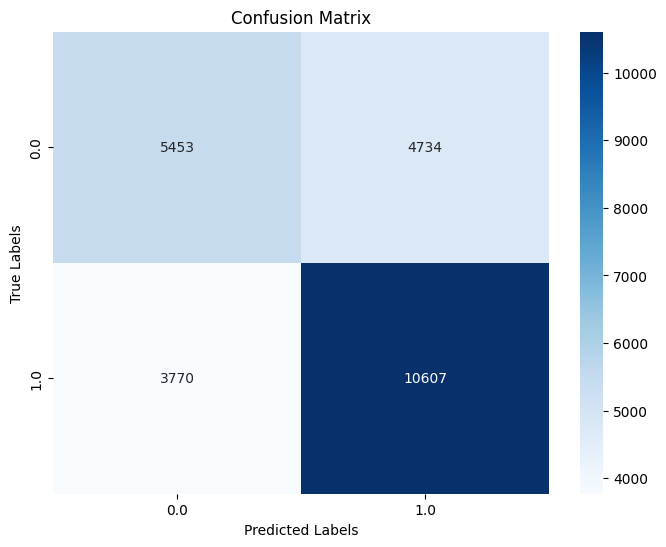

In [13]:
#K-Nearest Neighbors (KNN)

# Initialize the KNN classifier with k=5 (you can change the value of k as needed)
model4 = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
model4.fit(X_train, y_train)

# Make predictions on the testing data
y_pred3 = model4.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

# Print classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred3))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Calculate false positives
false_positives = sum((y_pred3 == 1) & (y_test == 0))

print("Number of false positives:", false_positives)

Number of false positives: 4734


In [15]:
# Calculate true negatives
true_negatives = sum((y_pred1 == 0) & (y_test == 0))

print("Number of true negatives:", true_negatives)

Number of true negatives: 6581


In [16]:
#Calculate the False positive rates
FPR = false_positives / (false_positives + true_negatives)
print("False Positive Rate : ", FPR)

False Positive Rate :  0.4183826778612461


4. Logistic Regression:- Logistic Regression is a statistical method used for binary classification tasks, where the goal is to predict the probability that an observation belongs to one of two possible classes.

Accuracy: 0.647532975085491
              precision    recall  f1-score   support

         0.0       0.59      0.48      0.53     10187
         1.0       0.68      0.76      0.72     14377

    accuracy                           0.65     24564
   macro avg       0.63      0.62      0.62     24564
weighted avg       0.64      0.65      0.64     24564



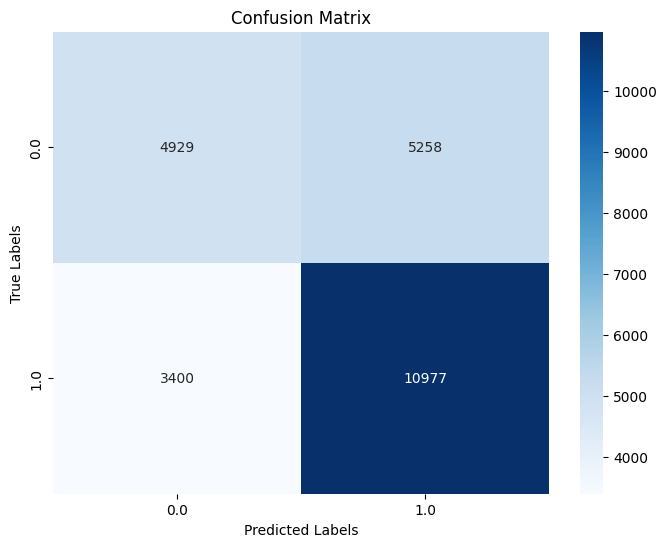

In [17]:
# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred4 = log_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)

# Print classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred4))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred4)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Calculate false positives
false_positives = sum((y_pred4 == 1) & (y_test == 0))

print("Number of false positives:", false_positives)

Number of false positives: 5258


In [19]:
# Calculate true negatives
true_negatives = sum((y_pred1 == 0) & (y_test == 0))

print("Number of true negatives:", true_negatives)

Number of true negatives: 6581


In [20]:
#Calculate the False positive rates
FPR = false_positives / (false_positives + true_negatives)
print("False Positive Rate : ", FPR)

False Positive Rate :  0.44412534842469803
